In [1]:
%pylab inline
from opt import trainAndEvaluatePrimalModel
import sklearn.metrics as metrics
from kernels import *
from utils import *


from theano import function, config, shared, sandbox
import theano.tensor as T
from theano.tensor.nnet import conv2d
from theano.tensor.signal.pool import pool_2d

/data/vaishaal/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


Using gpu device 0: Tesla K20c (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 4007)


In [2]:
DATAPATH = '/data/vaishaal/endive-exp/EGR1_withNegatives/'

In [3]:
XSeqTrain, labelsTrain = loadSeqFromText(DATAPATH + "EGR1_GM12878_Egr-1_HudsonAlpha_AC.seq", delim=' ')

In [5]:
XSeqTest, labelsTest = loadSeqFromText(DATAPATH + "EGR1_GM12878_Egr-1_HudsonAlpha_B.seq", delim='\t')

In [6]:
XTrain = convertSeqToMatrix(XSeqTrain)
XTest = convertSeqToMatrix(XSeqTest)

In [7]:
D = 1024
W = np.random.randn(D,8*4) * 1.0
b = np.random.uniform(0,1,size=D)

In [8]:
%time XLiftTrain_cpu = generateConvFeatures(XTrain, W, offset=b, gpu=False)
%time XLiftTest_cpu = generateConvFeatures(XTest, W, offset=b, gpu=False)

0 Images Convolved
1000 Images Convolved
2000 Images Convolved
3000 Images Convolved
4000 Images Convolved
5000 Images Convolved
6000 Images Convolved
7000 Images Convolved
8000 Images Convolved
9000 Images Convolved
10000 Images Convolved
11000 Images Convolved
12000 Images Convolved
13000 Images Convolved
14000 Images Convolved
15000 Images Convolved
16000 Images Convolved
17000 Images Convolved
18000 Images Convolved
19000 Images Convolved
20000 Images Convolved
21000 Images Convolved
22000 Images Convolved
23000 Images Convolved
24000 Images Convolved
25000 Images Convolved
26000 Images Convolved
27000 Images Convolved
28000 Images Convolved
29000 Images Convolved
30000 Images Convolved
31000 Images Convolved
CPU times: user 59min 42s, sys: 1min 47s, total: 1h 1min 29s
Wall time: 2min 37s
0 Images Convolved
CPU times: user 1min 59s, sys: 3.98 s, total: 2min 3s
Wall time: 5.15 s


X SHAPE  (31662, 404)
Computing XTX
Done Computing XTX
Train acc 0.6021097846
Test acc 0.644644644645
Train ROC  0.638565364954
Test ROC  0.721314629259


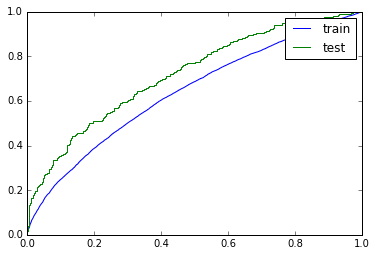

In [9]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XTrain, XTest, labelsTrain, labelsTest)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print "Train ROC ", metrics.auc(train_roc[0], train_roc[1])
print "Test ROC ", metrics.auc(test_roc[0], test_roc[1])
plt.legend(handles=[train[0], test[0]])

X SHAPE  (31662, 1024)
Computing XTX
Done Computing XTX
Train acc 0.794390752321
Test acc 0.837837837838
Train ROC  0.876160952732
Test ROC  0.917523046092


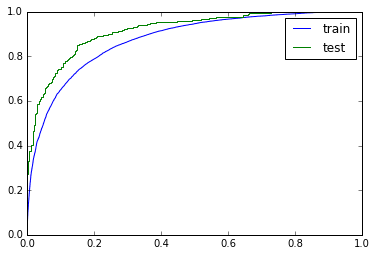

In [10]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XLiftTrain_cpu, XLiftTest_cpu,labelsTrain,labelsTest)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print "Train ROC ", metrics.auc(train_roc[0], train_roc[1])
print "Test ROC ", metrics.auc(test_roc[0], test_roc[1])
plt.legend(handles=[train[0], test[0]])